### 直接输入数

In [65]:
import numpy as np

import torch
import torch.nn as nn


X_train = torch.tensor(np.array([np.arange(1,801)]).T, dtype=torch.float32)      #[800,1]
X_test = torch.tensor(np.array([np.arange(801,1001)]).T, dtype=torch.float32)     #[200,1]
y_train, y_test = X_train%2, X_test%2                       #[800,1] [200,1]
y_test = y_test.numpy()

# 定义一个简单的神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# 实例化模型
model = Net()

# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

first_Loss = []
first_acc = []
# 训练模型
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    first_Loss.append(loss.item())

    loss.backward()
    optimizer.step()
    if (epoch + 1) % 1 == 0:
    # 每个epoch测试一下
        with torch.no_grad():
            count = 0
            outputs = model(X_test)
            predicted = (outputs > 0.5).numpy()
            acc = np.equal(predicted,y_test)
            for item in acc:
                if item[0]== True:
                    count +=1
            first_acc.append(count/200)
        print(f'Epoch:{epoch+1}/1000, Loss: {loss.item()}, Acc:{count/200}')

Epoch:1/1000, Loss: 0.8794938921928406, Acc:0.5
Epoch:2/1000, Loss: 0.8552984595298767, Acc:0.5
Epoch:3/1000, Loss: 0.8326699733734131, Acc:0.5
Epoch:4/1000, Loss: 0.8116880655288696, Acc:0.5
Epoch:5/1000, Loss: 0.7924250960350037, Acc:0.5
Epoch:6/1000, Loss: 0.7749385237693787, Acc:0.5
Epoch:7/1000, Loss: 0.759268581867218, Acc:0.5
Epoch:8/1000, Loss: 0.745436429977417, Acc:0.5
Epoch:9/1000, Loss: 0.7334417104721069, Acc:0.5
Epoch:10/1000, Loss: 0.7232598066329956, Acc:0.5
Epoch:11/1000, Loss: 0.7148407697677612, Acc:0.5
Epoch:12/1000, Loss: 0.708113431930542, Acc:0.5
Epoch:13/1000, Loss: 0.7029891014099121, Acc:0.5
Epoch:14/1000, Loss: 0.699380099773407, Acc:0.5
Epoch:15/1000, Loss: 0.6972482204437256, Acc:0.5
Epoch:16/1000, Loss: 0.6967172026634216, Acc:0.5
Epoch:17/1000, Loss: 0.696687638759613, Acc:0.5
Epoch:18/1000, Loss: 0.6966595649719238, Acc:0.5
Epoch:19/1000, Loss: 0.6966326832771301, Acc:0.5
Epoch:20/1000, Loss: 0.6966068744659424, Acc:0.5
Epoch:21/1000, Loss: 0.69658225774

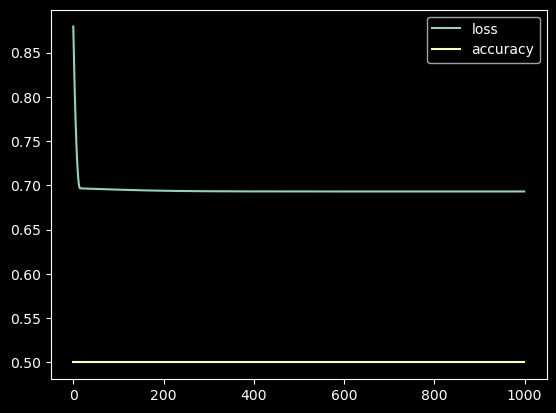

In [101]:
import matplotlib.pyplot as plt

plt.plot(first_Loss,label='loss')
plt.plot(first_acc,label='accuracy')
plt.legend()

初步结论 利用relu和simoid的情况下用BCEloss无法训练

### 输入二进制

In [88]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# 定义数据集类
class NumberDataset(Dataset):
    def __init__(self, start, end):
        self.x = torch.tensor(np.array([list(map(int, list(bin(i)[2:].zfill(8)))) for i in range(start, end+1)]), dtype=torch.float32)
        self.y = torch.tensor(np.array([i % 2 for i in range(start, end+1)]), dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# 定义一个简单的神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# 实例化模型和数据集
model = Net()
dataset = NumberDataset(0, 200)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 统计
sec_Loss = []
sec_acc = []
# 训练模型
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
for epoch in range(1000):
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # 使用模型进行预测
    test_data = NumberDataset(201, 255)
    dataloader = DataLoader(test_data, batch_size=len(test_data))
    # test_data = torch.tensor(np.array([list(map(int, list(bin(8)[2:].zfill(8))))]), dtype=torch.float32)
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            acc = np.equal(predicted,labels)
    sec_Loss.append(loss.item())
    sec_acc.append(sum(acc)/55)
    if (epoch + 1) % 1 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Acc:{:.4f}'.format(epoch+1, 100, loss.item(),sum(acc)/55))
        # if predicted[0] == 0:
        #     print("Number is even")
        # else:
        #     print("Number is odd")


Epoch [1/100], Loss: 0.6737, Acc:0.5091
Epoch [2/100], Loss: 0.6975, Acc:0.5091
Epoch [3/100], Loss: 0.6971, Acc:0.5091
Epoch [4/100], Loss: 0.6967, Acc:0.5091
Epoch [5/100], Loss: 0.6963, Acc:0.5091
Epoch [6/100], Loss: 0.6958, Acc:0.5091
Epoch [7/100], Loss: 0.6954, Acc:0.5091
Epoch [8/100], Loss: 0.6949, Acc:0.5091
Epoch [9/100], Loss: 0.6944, Acc:0.5091
Epoch [10/100], Loss: 0.6939, Acc:0.5091
Epoch [11/100], Loss: 0.6935, Acc:0.5091
Epoch [12/100], Loss: 0.6930, Acc:0.5091
Epoch [13/100], Loss: 0.6925, Acc:0.5091
Epoch [14/100], Loss: 0.6920, Acc:0.5091
Epoch [15/100], Loss: 0.6915, Acc:0.5091
Epoch [16/100], Loss: 0.6910, Acc:0.5091
Epoch [17/100], Loss: 0.6905, Acc:0.5091
Epoch [18/100], Loss: 0.6900, Acc:0.5091
Epoch [19/100], Loss: 0.6895, Acc:0.5091
Epoch [20/100], Loss: 0.6890, Acc:0.5091
Epoch [21/100], Loss: 0.6885, Acc:0.5091
Epoch [22/100], Loss: 0.6881, Acc:0.5091
Epoch [23/100], Loss: 0.6876, Acc:0.5091
Epoch [24/100], Loss: 0.6871, Acc:0.5091
Epoch [25/100], Loss: 0.6

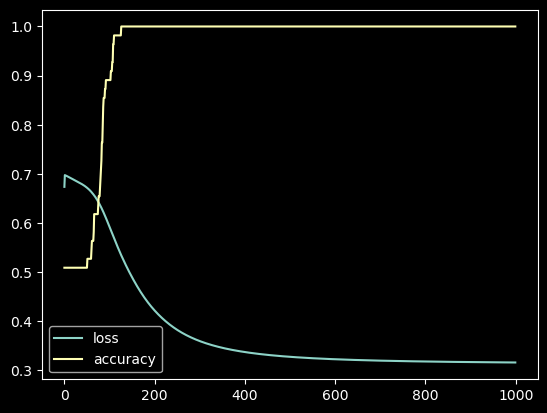

In [95]:
import matplotlib.pyplot as plt

plt.plot(sec_Loss,label='loss')
plt.plot(sec_acc,label='accuracy')
plt.legend()

### 利用cos和sin

In [99]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# 定义数据集类
class NumberDataset(Dataset):
    def __init__(self, start, end):
        self.x = torch.tensor(np.array([i for i in range(start, end+1)]), dtype=torch.float32)
        self.y = torch.tensor(np.array([i % 2 for i in range(start, end+1)]), dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# 定义一个简单的神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# 实例化模型和数据集
model = Net()
dataset = NumberDataset(0, 200)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

third_Loss = []
third_acc = []

# 训练模型
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
for epoch in range(1000):
    for i, (inputs, labels) in enumerate(dataloader):
        inputs_sin = torch.sin(inputs * (np.pi / 256)).unsqueeze(1)
        inputs_cos = torch.cos(inputs * (np.pi / 256)).unsqueeze(1)
        inputs_processed = torch.cat((inputs_sin, inputs_cos), dim=1)
        optimizer.zero_grad()
        outputs = model(inputs_processed)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 使用模型进行预测
    test_data = NumberDataset(201, 255)
    dataloader = DataLoader(test_data, batch_size=len(test_data))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs_sin = torch.sin(inputs * (np.pi / 256)).unsqueeze(1)
            inputs_cos = torch.cos(inputs * (np.pi / 256)).unsqueeze(1)
            inputs_processed = torch.cat((inputs_sin, inputs_cos), dim=1)
            outputs = model(inputs_processed)
            _, predicted = torch.max(outputs, 1)
            acc = np.equal(predicted,labels)
        third_Loss.append(loss.item())
        third_acc.append(sum(acc)/55)
    
    if (epoch + 1) % 1 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Acc:{:.4f}'.format(epoch+1, 100, loss.item(),sum(acc)/55))


Epoch [1/100], Loss: 0.7032, Acc:0.4909
Epoch [2/100], Loss: 0.6946, Acc:0.4909
Epoch [3/100], Loss: 0.6945, Acc:0.4909
Epoch [4/100], Loss: 0.6945, Acc:0.4909
Epoch [5/100], Loss: 0.6944, Acc:0.4909
Epoch [6/100], Loss: 0.6943, Acc:0.4909
Epoch [7/100], Loss: 0.6943, Acc:0.4909
Epoch [8/100], Loss: 0.6942, Acc:0.4909
Epoch [9/100], Loss: 0.6941, Acc:0.4909
Epoch [10/100], Loss: 0.6940, Acc:0.4909
Epoch [11/100], Loss: 0.6940, Acc:0.4909
Epoch [12/100], Loss: 0.6939, Acc:0.4909
Epoch [13/100], Loss: 0.6938, Acc:0.4909
Epoch [14/100], Loss: 0.6938, Acc:0.4909
Epoch [15/100], Loss: 0.6937, Acc:0.4909
Epoch [16/100], Loss: 0.6936, Acc:0.4909
Epoch [17/100], Loss: 0.6936, Acc:0.4909
Epoch [18/100], Loss: 0.6935, Acc:0.4909
Epoch [19/100], Loss: 0.6935, Acc:0.4909
Epoch [20/100], Loss: 0.6934, Acc:0.4909
Epoch [21/100], Loss: 0.6934, Acc:0.4909
Epoch [22/100], Loss: 0.6933, Acc:0.4909
Epoch [23/100], Loss: 0.6933, Acc:0.5091
Epoch [24/100], Loss: 0.6932, Acc:0.4909
Epoch [25/100], Loss: 0.6

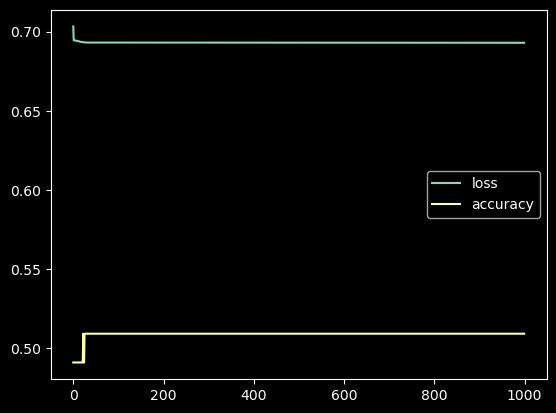

In [100]:
import matplotlib.pyplot as plt

plt.plot(third_Loss,label='loss')
plt.plot(third_acc,label='accuracy')
plt.legend()